In [51]:
%load_ext autoreload
%autoreload 2

import numpy as np
from GradientBoostedTreesRegressor import GradientBoostedTreesRegressor
from GradientBoostedTreesClassifier import GradientBoostedTreesClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Iris Dataset | Classification

In [52]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Features:", feature_names)
print("Target labels:", target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target labels: ['setosa' 'versicolor' 'virginica']


In [53]:
random_forest = GradientBoostedTreesClassifier(
    num_trees=10,
    learning_rate=1e-3,
    min_samples_per_node=5,
    max_depth=5,
    # impurity_measure='variance',
    num_targets=3
)

wawa = random_forest.build_forest(X_train, y_train)

In [54]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[1] 1
[0] 0
[2] 2
[1] 1
[1] 1
[0] 0
[1] 1
[2] 2
[1] 1
[1] 1
[2] 2
[0] 0
[0] 0
[0] 0
[0] 0
[1] 1
[2] 2
[1] 1
[1] 1
[2] 2
[0] 0
[1] 2
[0] 0
[2] 2
[2] 2
[2] 2
[1] 2
[2] 2
[0] 0
[0] 0


# Iris Dataset (With Null Values) | Classification

In [79]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Features:", feature_names)
print("Target labels:", target_names)

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)

# Introduce NaN values into the dataset

# For example, set 5, 10, 11 random values in the 1st, 3rd, 4th column to NaN
nan_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[nan_indices, df.columns[0]] = np.nan
nan_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[nan_indices, df.columns[2]] = np.nan
nan_indices = np.random.choice(df.index, size=11, replace=False)
df.loc[nan_indices, df.columns[3]] = np.nan

# Display the DataFrame with NaN values
print(df.head(10))

X = df.to_numpy()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target labels: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                NaN               3.1                1.5               0.1


In [86]:
gbm = GradientBoostedTreesClassifier(
    num_trees=5,
    min_samples_per_node=5,
    max_depth=np.inf,
    impurity_measure='entropy',
    num_targets=3
)

wawa = gbm.build_forest(X_train, y_train)

In [87]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[1] 1
[0] 0
[2] 2
[1] 1
[1] 1
[0] 0
[1] 1
[2] 2
[1] 1
[1] 1
[2] 2
[0] 0
[0] 0
[0] 0
[0] 0
[1] 1
[2] 2
[1] 1
[1] 1
[2] 2
[0] 0
[2] 2
[0] 0
[2] 2
[2] 2
[2] 2
[1] 2
[2] 2
[0] 0
[0] 0


# Breast Cancer Dataset | Classification

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame=True)
X, y = cancer.data.to_numpy(), cancer.target.to_numpy()
# print(X.head())  # Display first few rows

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(cancer.target_names)  # Display target classes

['malignant' 'benign']


In [56]:
random_forest = GradientBoostedTreesClassifier(
    num_trees=10,
    min_samples_per_node=5,
    max_depth=100,
    impurity_measure='entropy',
    num_targets=2
)

In [57]:
wawa = random_forest.build_forest(X_train, y_train)

In [59]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[0] 0
[0] 0
[0] 0
[0] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[1] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[1] 1
[0] 1
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[0] 1
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[0] 0
[1] 1
[1] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[0] 0
[0] 0
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[0] 1
[1] 1
[0] 0
[1] 1
[1] 1
[0] 0


# Diabetes Dataset | Regression

In [60]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data.to_numpy(), diabetes.target.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
random_forest = GradientBoostedTreesRegressor(
    min_samples_per_node=5,
    max_depth=10,
    impurity_measure='variance',
    # num_targets=2
)

In [62]:
wawa = random_forest.build_forest(X_train, y_train)

In [63]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[173.27684706] 219.0
[372.96245063] 70.0
[113.14401541] 202.0
[156.75308195] 230.0
[244.84334317] 111.0
[102.53133331] 84.0
[288.04931972] 242.0
[389.1251324] 272.0
[259.91649273] 94.0
[365.17875563] 96.0
[127.22617829] 94.0
[395.79297662] 252.0
[109.9199514] 99.0
[277.10519922] 297.0
[396.52742073] 135.0
[98.55849224] 67.0
[403.58985537] 295.0
[232.34189825] 264.0
[401.56897916] 170.0
[239.74847374] 275.0
[223.48428933] 310.0
[111.70411973] 64.0
[51.82347566] 128.0
[339.89744757] 232.0
[105.23239235] 129.0
[415.36331477] 118.0
[412.52224264] 263.0
[284.53070822] 77.0
[43.14918044] 48.0
[207.38031704] 107.0
[349.67665228] 140.0
[57.08519947] 113.0
[421.79136939] 90.0
[405.88901485] 164.0
[207.62108766] 180.0
[240.38829998] 233.0
[272.71532329] 42.0
[106.66409022] 84.0
[136.00210513] 172.0
[110.156923] 63.0
[67.16285142] 48.0
[210.21690582] 108.0
[261.12309017] 156.0
[177.9756488] 168.0
[299.9808201] 90.0
[113.15536865] 52.0
[227.20832711] 200.0
[214.75008779] 87.0
[69.49012678] 90.0
[2

# Diabetes Dataset (with Null Values) | Regression

In [88]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data.to_numpy(), diabetes.target.to_numpy()

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X) 

# Introduce NaN values into the dataset
nan_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices, df.columns[0]] = np.nan
nan_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices, df.columns[2]] = np.nan
nan_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices, df.columns[3]] = np.nan
nan_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices, df.columns[6]] = np.nan
nan_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices, df.columns[7]] = np.nan

# Display the DataFrame with NaN values
# print(df.head(10))

X = df.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [101]:
gbm = GradientBoostedTreesRegressor(
    num_trees=3,
    min_samples_per_node=5,
    max_depth=10,
    impurity_measure='variance',
    num_targets=1,
    learning_rate=1e-4
)

wawa = gbm.build_forest(X_train, y_train)


In [102]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[146.53816705] 219.0
[225.0449929] 70.0
[146.56742852] 202.0
[300.49016865] 230.0
[149.56432169] 111.0
[92.60050516] 84.0
[201.88341379] 242.0
[178.80340359] 272.0
[279.97508571] 94.0
[195.59773876] 96.0
[139.81990219] 94.0
[163.51298004] 252.0
[139.84760712] 99.0
[243.92188317] 297.0
[50.5094625] 135.0
[79.02848926] 67.0
[257.92977212] 295.0
[293.08492101] 264.0
[175.99602291] 170.0
[218.67477649] 275.0
[245.99092609] 310.0
[104.55224402] 64.0
[92.61895252] 128.0
[218.71847008] 232.0
[284.31236133] 129.0
[142.57124154] 118.0
[237.13993609] 263.0
[174.54619347] 77.0
[80.03138428] 48.0
[50.51952678] 107.0
[102.34306006] 140.0
[139.87531205] 113.0
[174.49391689] 90.0
[347.62598194] 164.0
[177.45939857] 180.0
[128.06398202] 233.0
[103.17507284] 42.0
[103.19566929] 84.0
[205.47574841] 172.0
[102.36349691] 63.0
[125.63803117] 48.0
[77.31694922] 108.0
[347.69517155] 156.0
[205.51679309] 168.0
[106.27555411] 90.0
[80.04734153] 52.0
[71.69522573] 200.0
[248.1239881] 87.0
[139.90301698] 90.0
[2

# Sine Wave | Regression

Reference: https://colab.research.google.com/drive/1YY7xaI1rRuVcrS-sCFTnMX5rPf2qFS8v#scrollTo=k-_xGd4vXcjN

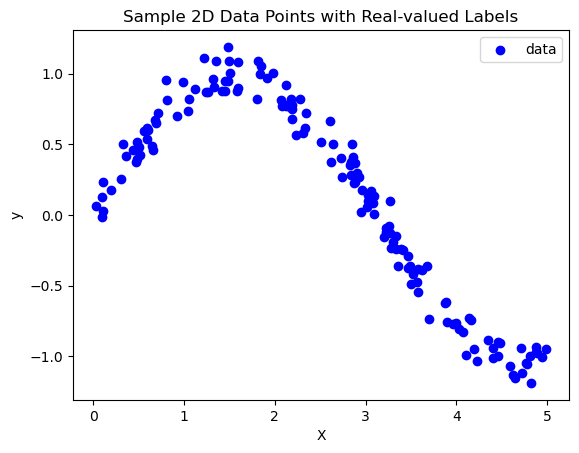

In [103]:
np.random.seed(0)
import matplotlib.pyplot as plt

n_samples = 150

X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randn(n_samples)*0.1

plt.figure()
plt.scatter(X, y, color='blue', label='data')
plt.title('Sample 2D Data Points with Real-valued Labels')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [105]:
random_forest = GradientBoostedTreesRegressor(
    num_trees=20,
    min_samples_per_node=5,
    max_depth=10,
    impurity_measure='variance',
    learning_rate=1e-4
).build_forest(X_train, y_train)

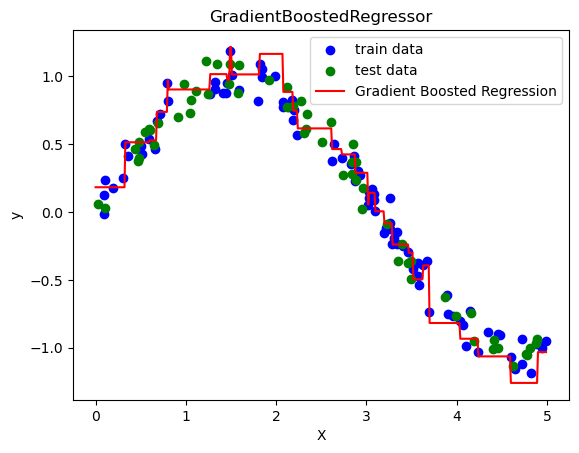

In [106]:
X_grid = np.arange(0, 5, 0.01)[:, np.newaxis]
y_preds= []
for x in X_grid:
    y_preds.append(random_forest.predict(x))

y_preds = np.array(y_preds)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.scatter(X_test, y_test, color='green', label='test data')
plt.plot(X_grid, y_preds, color='red', label='Gradient Boosted Regression')
plt.title('GradientBoostedRegressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Toy Multiout-Regression Problem c/o sklearn

Feature matrix shape (X): (2000, 10)
Target matrix shape (y): (2000, 3)


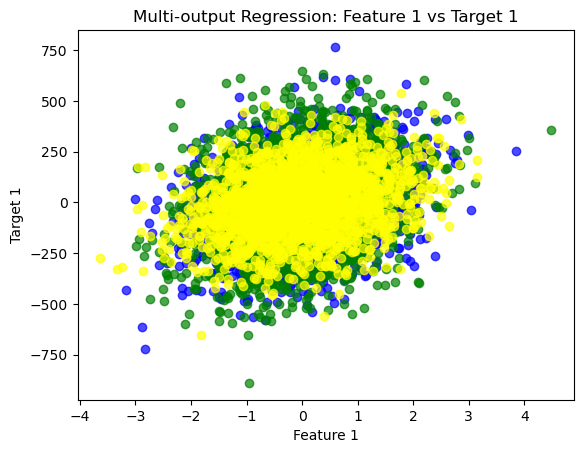

In [107]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate synthetic multi-output regression data
X, y = make_regression(
    n_samples=2000,      # Number of samples
    n_features=10,       # Number of input features
    n_informative=10,    # Number of informative features
    n_targets=3,        # Number of target variables (multi-output)
    noise=0.1,          # Add some noise
    random_state=42     # Reproducibility
)

print("Feature matrix shape (X):", X.shape)
print("Target matrix shape (y):", y.shape)

# Visualize one target dimension against a feature (optional)
plt.scatter(X[:, 0], y[:, 0], alpha=0.7, color='blue')
plt.scatter(X[:, 1], y[:, 1], alpha=0.7, color='green')
plt.scatter(X[:, 2], y[:, 2], alpha=0.7, color='yellow')
plt.xlabel("Feature 1")
plt.ylabel("Target 1")
plt.title("Multi-output Regression: Feature 1 vs Target 1")
plt.show()


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [109]:
decision_tree = GradientBoostedTreesRegressor(
    num_trees=10,
    min_samples_per_node=5,
    max_depth=10,
    impurity_measure='variance',
    num_targets=3,
    learning_rate=1e-4
).build_forest(X_train, y_train)

In [110]:
for inde in range(X_test.shape[0]):
    print(decision_tree.predict(X_test[inde]), y_test[inde])

[48.58979544 37.0554472  30.40044677] [ 51.51376112 108.2763559   65.48800266]
[-105.74941813  -82.96886022   53.78955385] [ -4.22524152 -87.4679486  157.90423513]
[48.63290086 37.08828827 30.42740393] [352.7953725  396.79656744 285.37860287]
[ -67.21666836 -181.61431069   18.81352472] [ -95.26854204 -240.25767748  -64.07139251]
[ 90.63307781 216.41131583 163.97976461] [161.39201538 429.68203544 247.10275011]
[-216.01233196 -183.00486584 -281.74558663] [-247.33141915 -393.27808638 -294.15961985]
[251.84027057  83.5865885   56.52889005] [287.79272654 262.10486864 143.50551956]
[ -97.87431938 -203.7143188   -69.68257486] [192.52069989 153.60006256 260.30567266]
[-121.53740004  -50.7890661   -53.93837869] [-58.90650677 -26.65692704  29.46327775]
[-294.86939271 -231.79014792 -218.7201538 ] [-296.9159578  -183.63041729 -279.8945684 ]
[  7.16696588 165.42454373 141.55941104] [102.44358885 185.26860835 245.89894464]
[240.75431416 545.27784738 239.42880028] [104.58519933 613.65526948 207.65868